# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

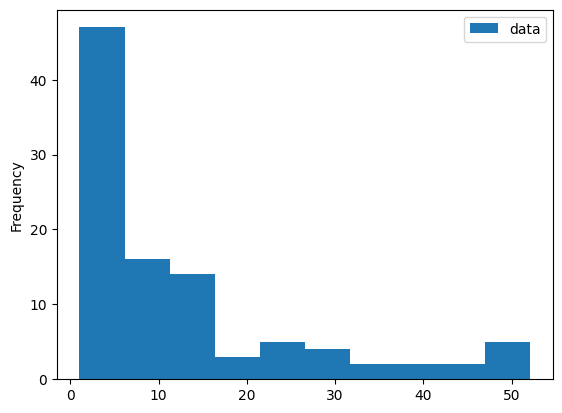

In [43]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

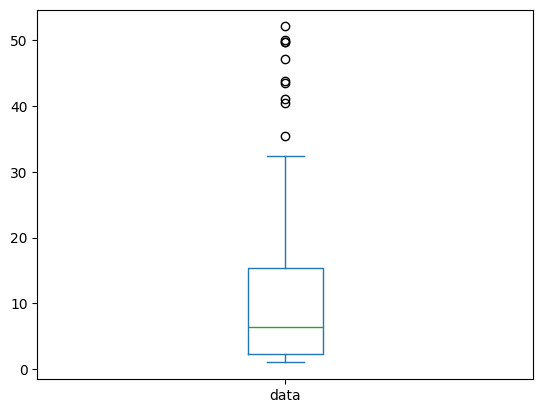

In [44]:
df.plot.box()

I believe the box and whisker plot does a better job of visualizing the data for the purposes of understanding the more expensive drugs compared the the rest. It gives a better feel for the number of different drugs that have higher prices.  However, it is difficult to understand how many of the drugs fall in the 'normal' category.  That is, are the ~10 outlier price drugs 10/100, or 10/10000?  THe histogram gives a better feel for that aspect of the data.  Both charts need better labelling.  Are these drugs that sold at this price?  The number of drugs that exist at a given price?  The context suggests the latter, but we have no clarification in the chart, nor labes for the x and y axes.  

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [45]:
df = pd.read_csv('/Users/mael.lescouezec/Documents/699 O2 Work/realtor-data.csv')
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


Price is the variable that I think will end up generally being our 'target' or at least the variable we are most interested in.  In the next block let's look at the mean, median, and mode.  Then, we'll look at characteristics of houses in certain pricing ranges.


In [46]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

print("The mean price is: ", mean_price,
      "The median price is: ", median_price,
      "The mode price is: ", mode_price)
print(df["price"].describe()) 


The mean price is:  524195.5192906774 The median price is:  325000.0 The mode price is:  350000.0
count    2.224841e+06
mean     5.241955e+05
std      2.138893e+06
min      0.000000e+00
25%      1.650000e+05
50%      3.250000e+05
75%      5.500000e+05
max      2.147484e+09
Name: price, dtype: float64


Hmmm, it seems we have a lot of price 0 houses.  These are likely filler values for houses that haven't been sold or are under construction.  Let's redo these analyses after removing these

In [47]:
df_filtered = df[df['price']!= 0]
mean_price_filtered = df_filtered['price'].mean()
median_price_filtered = df_filtered['price'].median()
mode_price_filtered = df_filtered['price'].mode()[0]

print("The mean price is: ", mean_price_filtered,
      "The median price is: ", median_price_filtered,
      "The mode price is: ", mode_price_filtered)

The mean price is:  524261.49848630355 The median price is:  325000.0 The mode price is:  350000.0


Now let's look at a histogram of the price. 

<Axes: ylabel='Frequency'>

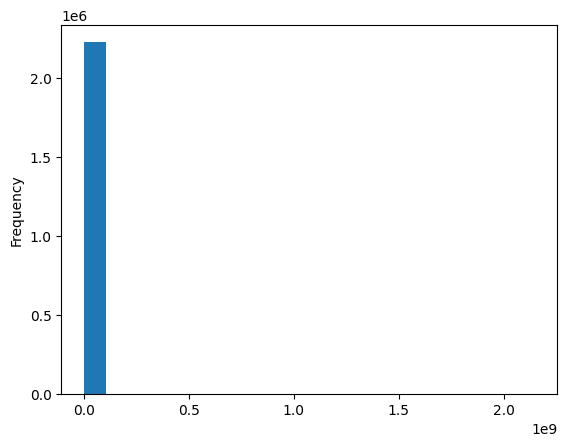

In [48]:
# df_filtered['price'].count()
# df_filtered['price'].nunique()
df_filtered['price'].plot.hist(bins=20)
# df_filtered['price'].describe()



What's happening here?  It seems there are some outliers really messing up this graph.  Let's double check this hypothesis, and then trim these outliers off of our data frame.

In [49]:
print("Original Stats: ",df_filtered['price'].describe())
lower_bound = df_filtered["price"].quantile(0.01)  
upper_bound = df_filtered["price"].quantile(0.99)  
df_trimmed = df_filtered[(df_filtered['price']>= lower_bound) & (df_filtered['price']<=upper_bound)] 

print("Trimmed stats: ", df_trimmed['price'].describe())
print(df_trimmed['price'].median())



Original Stats:  count    2.224561e+06
mean     5.242615e+05
std      2.139020e+06
min      1.000000e+00
25%      1.650000e+05
50%      3.250000e+05
75%      5.500000e+05
max      2.147484e+09
Name: price, dtype: float64
Trimmed stats:  count    2.183325e+06
mean     4.477127e+05
std      4.752355e+05
min      1.000000e+04
25%      1.690000e+05
50%      3.250000e+05
75%      5.490000e+05
max      3.899000e+06
Name: price, dtype: float64
325000.0


Now let's try our analyses again:


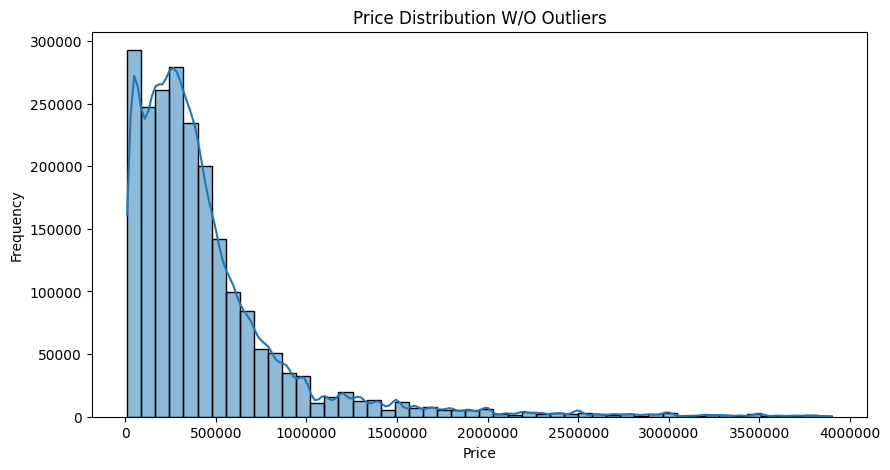

In [54]:
plt.figure(figsize=(10,5))
sns.histplot(df_trimmed["price"], bins=50, kde=True)
plt.ticklabel_format(style="plain", axis="x")#take out scientific notation -- from gpt and stack exchange
plt.title("Price Distribution W/O Outliers")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

Now let's separate the price into different bins, so we can get a feel for the other parameters

In [70]:

price_labels = ["<100K", "100K-250K", "250K-500K", "500K-750K", "750K-1M", "1M-2M", "2M+"]
df_final = df_trimmed.copy()
price_bins = [0, 100000, 250000, 500000, 750000, 1000000, 2000000, df_final["price"].max()]
df_final["price_category"] = pd.cut(df_final["price"], bins=price_bins, labels=price_labels, include_lowest=True)#adds new parameter
summary = df_final.groupby("price_category")[["bed", "bath", "acre_lot", "house_size"]].describe()
print(summary)

/var/folders/fs/qss4ywf15f7drnvq43fnn2n40000gn/T/ipykernel_37437/2914811522.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_final.groupby("price_category")[["bed", "bath", "acre_lot", "house_size"]].describe()


                     bed                                                 \
                   count      mean       std  min  25%  50%  75%    max   
price_category                                                            
<100K            96009.0  2.621671  1.005862  1.0  2.0  3.0  3.0   66.0   
100K-250K       402693.0  2.840760  1.232472  1.0  2.0  3.0  3.0  473.0   
250K-500K       675679.0  3.232295  1.273769  1.0  3.0  3.0  4.0  444.0   
500K-750K       280870.0  3.509364  1.345661  1.0  3.0  3.0  4.0  222.0   
750K-1M         123234.0  3.666926  1.394174  1.0  3.0  4.0  4.0   70.0   
1M-2M           112054.0  3.936647  2.061094  1.0  3.0  4.0  5.0  212.0   
2M+              34399.0  4.439141  3.149355  1.0  3.0  4.0  5.0  142.0   

                    bath            ... acre_lot           house_size  \
                   count      mean  ...      75%       max      count   
price_category                      ...                                 
<100K            95407.0  1.47

Now let's make some plots describing the parameters in each category


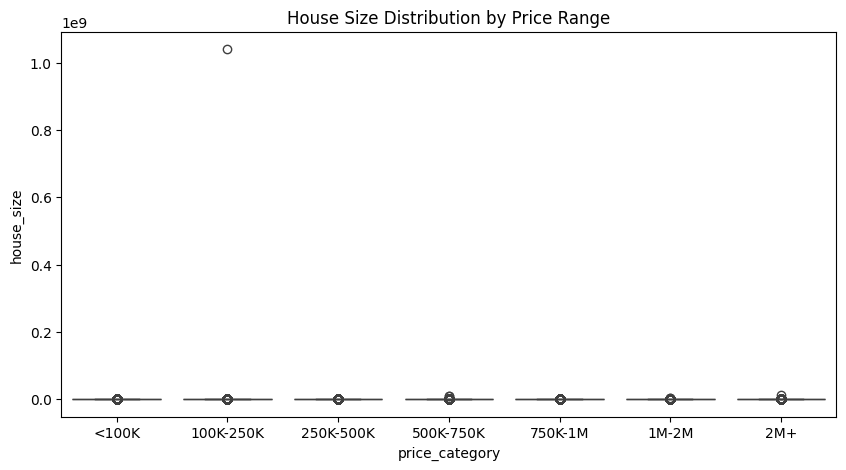

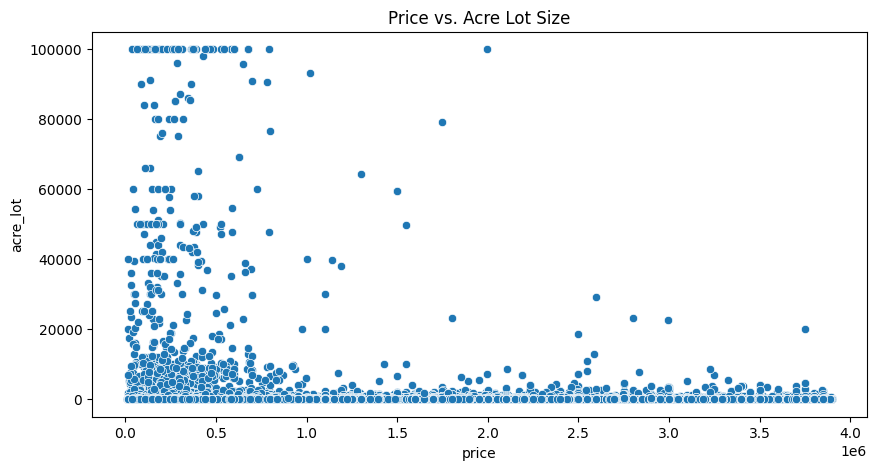

In [73]:
plt.figure(figsize=(10,5))
sns.boxplot(x="price_category", y="house_size", data=df_final)
plt.title("House Size Distribution by Price Range")

plt.show()

# Scatter plot for price vs. lot size
plt.figure(figsize=(10,5))
sns.scatterplot(x="price", y="acre_lot", data=df_final)
plt.title("Price vs. Acre Lot Size")
plt.show()

Again these are pretty terrible graphs.  it looks like we have to filter out outliers again

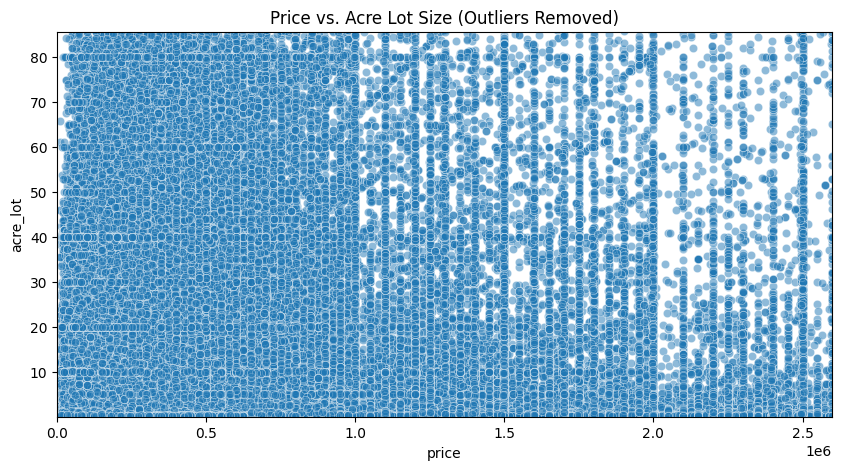

In [74]:
plt.figure(figsize=(10,5))


lot_lower = df_final["acre_lot"].quantile(0.01)
lot_upper = df_final["acre_lot"].quantile(0.99)
price_upper = df_final["price"].quantile(0.99)  # Prevent huge prices from distorting the view

sns.scatterplot(x="price", y="acre_lot", data=df_final, alpha=0.5)
plt.ylim(lot_lower, lot_upper)  # Limit y-axis
plt.xlim(0, price_upper)  # Limit x-axis
plt.title("Price vs. Acre Lot Size (Outliers Removed)")
plt.show()

Clearly, a scatter plot is not the best choice:


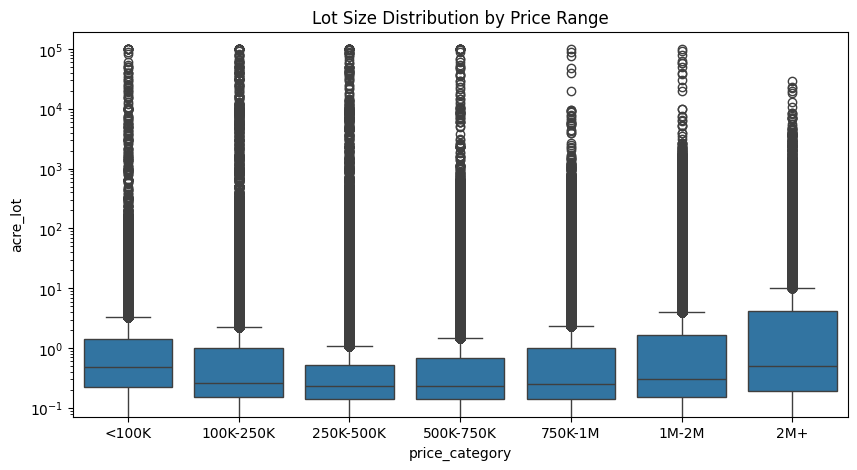

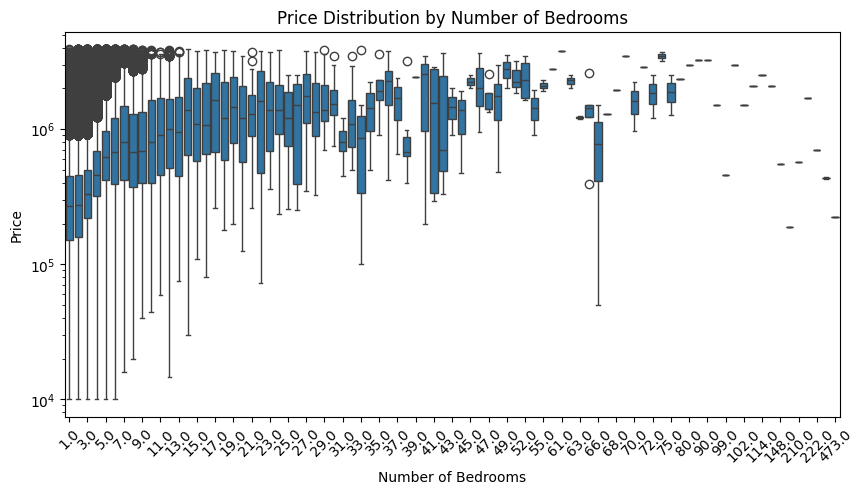

In [79]:
plt.figure(figsize=(10,5))
sns.boxplot(x="price_category", y="acre_lot", data=df_final)
plt.yscale("log")#log scale to make it more readable

plt.title("Lot Size Distribution by Price Range")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x="bed", y="price", data=df_final)
plt.yscale("log")
plt.title("Price Distribution by Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")

# Show only every 2nd label
plt.xticks(ticks=plt.xticks()[0][::2], rotation=45) 

plt.show()

473 bedrooms?  We'll figure out what's going on with this later.  For now let's just limit the xaxis

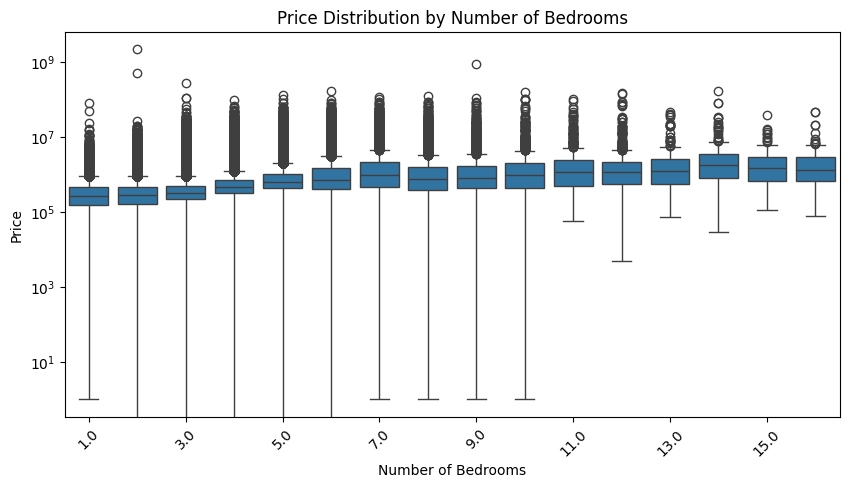

In [85]:
plt.figure(figsize=(10,5))
sns.boxplot(x="bed", y="price", data=df)
plt.yscale("log")
plt.title("Price Distribution by Number of Bedrooms")
plt.xlim(-0.5, 15.5)  
plt.xticks(range(0, 16))  


plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")

# show only every 2nd label
plt.xticks(ticks=plt.xticks()[0][::2], rotation=45)  

plt.show()

Some interesting analyses!  Let's finish off by doing a number of different graphs with different parameters

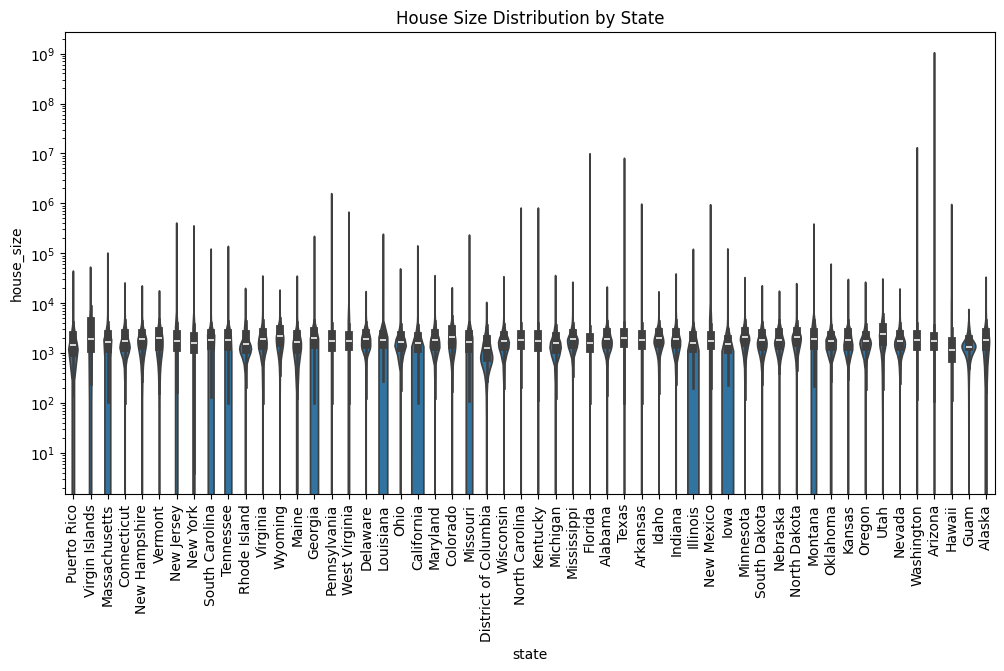

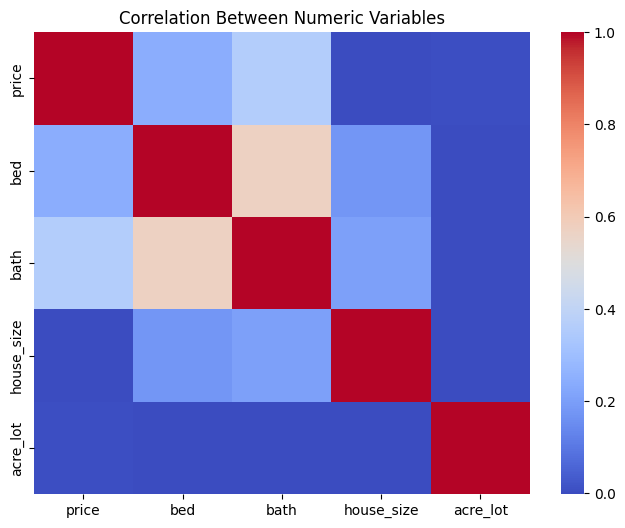

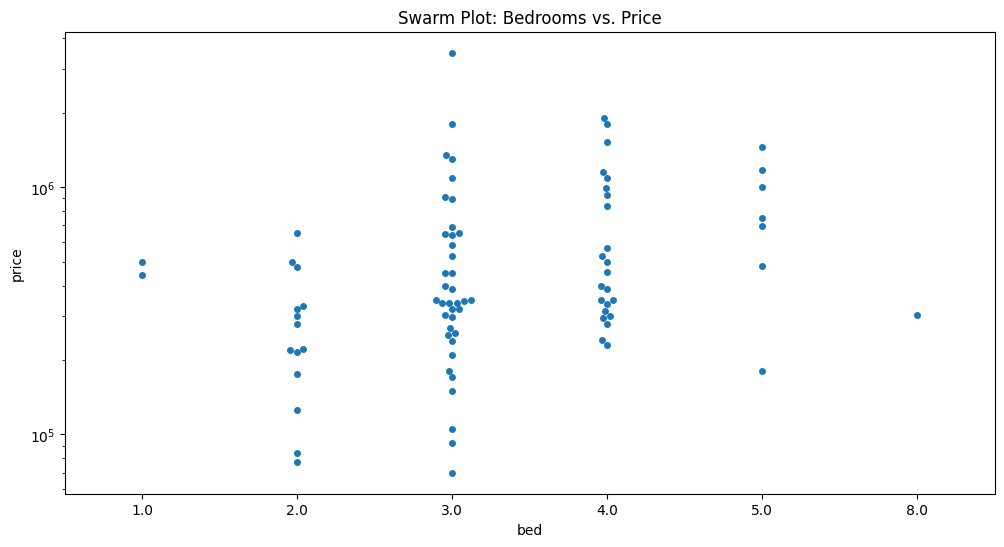

In [95]:
#Violing plot of hosue size by state
plt.figure(figsize=(12, 6))
sns.violinplot(x="state", y="house_size", data=df_final)
plt.yscale("log")
plt.title("House Size Distribution by State")
plt.xticks(rotation=90)  # Rotate labels for readability
plt.show()

#correlation nmatrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_final[["price", "bed", "bath", "house_size", "acre_lot"]].corr(),  cmap="coolwarm")
plt.title("Correlation Between Numeric Variables")
plt.show()

#Swarm plot
plt.figure(figsize=(12, 6))
sns.swarmplot(x="bed", y="price", data=df_final.sample(100))
plt.yscale("log")  
plt.title("Swarm Plot: Bedrooms vs. Price")
plt.show()

Conclusions:
Is this data usable?  Yes, I believe so!  There are some odd rows (what house has 473 bedrooms?  Maybe an apartment complex?) that need to be investigated, but with some cleaning this will make an excellent data set.  

Are there outliers?  Holy smokes there are some outliers.  There are houses that cost $1 billion, and houses with hundreds of bedrooms.  These will have to be accounted for in our analyses.  

Are there related variables?  Absolutely.  We see these in the correlation matrix and we see in some of our beginning analyses.  Bigger houses cost more, and houses with big lots cost more.  There are undoubtedly more connections that we will find when we dive deeper into the analysis.  

Distributions appear to be skewed, but that could also be because of some of the outlier values.  We do see some U-shaped distributions when we limit the axes.  

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

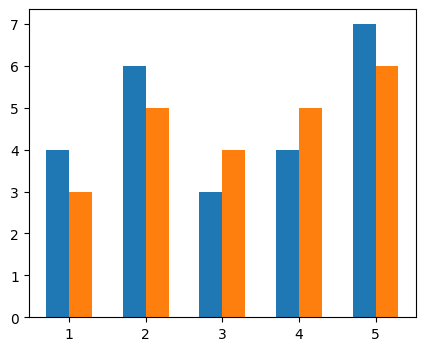

In [110]:
cat = ["Cat 1", "Cat 2", "Cat 3", "Cat 4", "Cat 5"]
A = [4, 6, 3, 4, 7] 
B = [3, 5, 4, 5, 6]
fig, ax = plt.subplots(figsize=(5, 4))
x = np.array([1,2,3,4,5])

bars_A = ax.bar(x-.15,A,  width=.3, label="A")
bars_B = ax.bar(x+.15, B, width=.3, label="B")